# MOST

Monin-Obukhov similarity (MOST) parametrizes the freestream flow profiles. 

In the freestream there must be a balance of the TKE budget:

$$
0 = T + \mathcal{P} + \mathcal{B} - \varepsilon
$$

Divide by $u_*^3/(\kappa z)$ gives:

$$
0 = \Phi_T + \Phi_\mathcal{P} + \Phi_\mathcal{B} - \Phi_\varepsilon
$$

In van der Laan et. al (2017), it is shown generally that:

- $\Phi_\mathcal{P} = \Phi_m$
- $\Phi_\mathcal{B} = -\zeta$


## Velocity gradient

$\Phi_m$

## Dissipation

Panofsky and Dutton (1984) or van der Laan (2017):

$$\Phi_\varepsilon = \begin{cases} 1-\zeta \quad,\quad \zeta < 0 \\ \Phi_m - \zeta \quad,\quad \zeta > 0 \end{cases}$$

Pahlow (2001) or Sumner (2006):

$$\Phi_\varepsilon =  0.61  + 5 \zeta \quad,\quad 10 > \zeta > 0$$

Kaimal and Finnigan (1994) or Sumner (2006):

$$\Phi_\varepsilon =  \left(1 + 0.5 |\zeta|^{2/3}\right)^{3/2} \quad,\quad \zeta < 0$$





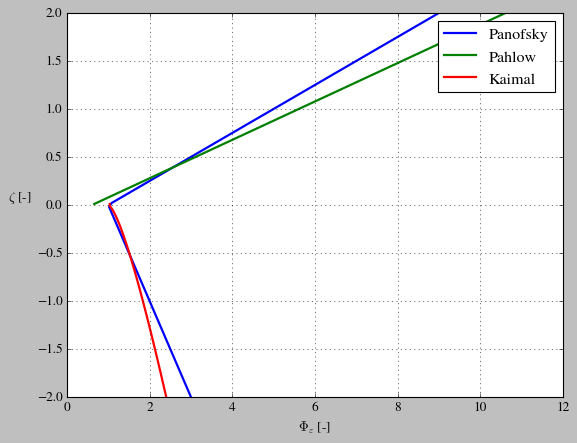

In [5]:
# Python stuff
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mchba.lib import *

#%%%%%%%%%%%% PLOT STYLE %%%%%%%%%%%%%%%%
mpl.style.use('classic')
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams["legend.scatterpoints"] = 1
plt.rcParams["legend.numpoints"] = 1
plt.rcParams['grid.linestyle'] = ':' # Dotted gridlines
mpl.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid']=True
yd = dict(rotation=0,ha='right') # I couldn't find a way to customize these, so use a dict everytime..
plt.close('all')

zeta = np.linspace(-2,2,100)
zeta_neg = np.linspace(-2,0.01,100)
zeta_pos = np.linspace(0.01,2,100)

phie_panof = phi_e(zeta)
phie_pahlow = 0.61 + 5*zeta_pos
phie_kaimal = (1 + 0.5*np.abs(zeta_neg)**(2/3))**(3/2)


fig = plt.figure()
plt.plot(phie_panof, zeta, label='Panofsky')
plt.plot(phie_pahlow, zeta_pos, label='Pahlow')
plt.plot(phie_kaimal, zeta_neg, label='Kaimal')
plt.xlabel(r'$\Phi_\varepsilon$ [-]')
plt.ylabel('$\zeta$ [-]',yd)
plt.legend()


## TKE

I define $\Phi_k$ as follows (not sure if anyone has done this before or whether there are other definitions???):

$$\Phi_k \equiv \frac{k}{k_{neutral}} = \left(\frac{\Phi_\varepsilon}{\Phi_m}\right)^{1/2} ,$$

where $k_{neutral} = u_*^2/C_\mu$.



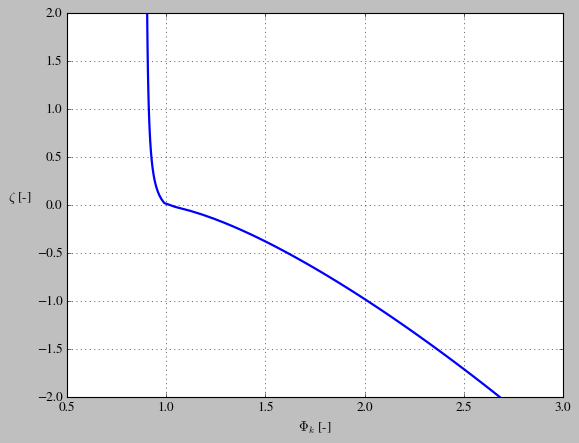

In [9]:
fig = plt.figure()

phik_panof = (phie_panof/phi_m(zeta))**(1/2)

plt.plot(phik_panof, zeta)
plt.xlabel('$\Phi_k$ [-]')
plt.ylabel('$\zeta$ [-]',yd);

## Turbulence intensity

$$
\begin{align} 
TI &= \frac{\sqrt{\frac{2}{3} k}}{U}\\
&= \frac{\kappa C_\mu^{-1/4} \sqrt{\frac{2}{3}} \left(\frac{\Phi_\varepsilon}{\Phi_m}\right)^{1/4}}{\mathrm{ln}(z/z_0) - \Psi_m}
\end{align}
$$

Not a similarity!?

## Transport

$\Phi_T$


## Temperature gradient

$\Phi_h$



